# PROJECT WORKFLOW:
1. Data Exploration (EDA)
2. Data Cleaning & Feature Selection
3. Model Building
4. Model Evaluation

# STEP 1 : DATA EXPLORATION
 WHAT: Understand and visualize the dataset
   WHY:  Can't build good models without understanding data
   
   TASKS:<br>
   • Load and inspect data (shape, types, preview)<br>
   • Check data quality (missing values, duplicates)<br>
   • Analyze target variable (class distribution, balance)<br>
   • Statistical analysis (mean, std, min, max)<br>
   • Visualize distributions (histograms, box plots)<br>
   • Correlation analysis (heatmap)<br>
   • Identify outliers<br>
   
   OUTPUT: Statistics, plots, initial insights

## 1.1: Load Libraries and Data

In [9]:
import pandas as pd  # For working with tables/data
import numpy as np   # For mathematical operations
import matplotlib.pyplot as plt  # For creating graphs
import seaborn as sns  # For beautiful visualizations

In [10]:
# ============================================

benign_path = '../data/benign_data/benign_samples_1sec.csv'


# ============================================
# LOAD ALL 10 ATTACK FILES
# ============================================
attack_path1 = '../data/attack_data/attack_samples_1sec.csv'
# attack_path2 = '../data/attack_data/attack_samples_2sec.csv'


# ============================================
# READ ALL BENIGN FILES
# ============================================
benign_df = pd.read_csv(benign_path)


# ============================================
# READ ALL ATTACK FILES
# ============================================
attack_df1 = pd.read_csv(attack_path1)
# attack_df2 = pd.read_csv(attack_path2)


# ============================================
# ADD LABELS TO ALL BENIGN FILES
# ============================================
benign_df['is_attack'] = 0

# ============================================
# ADD LABELS TO ALL ATTACK FILES
# ============================================
attack_df1['is_attack'] = 1
# attack_df2['is_attack'] = 1


# ============================================
# PRINT SHAPES OF ALL FILES
# ============================================
print("="*60)
print("BENIGN FILES")
print("="*60)
print("Dataset shape benign_df1:", benign_df.shape)

print("\n" + "="*60)
print("ATTACK FILES")
print("="*60)
print("Dataset shape attack_df1:", attack_df1.shape)
# print("Dataset shape attack_df2:", attack_df2.shape)

# ============================================
# COMBINE ALL ATTACK FILES
# ============================================
# attack_df = pd.concat([
#     attack_df1, attack_df2
# ], ignore_index=True)

# print("\n" + "="*60)
# print("Combined attack_df:", attack_df.shape)
# print("="*60)


# COMBINE ATTACK AND BENIGN
# ============================================
df = pd.concat([benign_df, attack_df1], ignore_index=True)

# Shuffle
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

print("\n" + "="*60)
print("FINAL COMBINED DATASET")
print("="*60)
print(f"Total samples: {df.shape[0]:,}")
print(f"Total features: {df.shape[1]}")


BENIGN FILES
Dataset shape benign_df1: (136800, 95)

ATTACK FILES
Dataset shape attack_df1: (90391, 95)

FINAL COMBINED DATASET
Total samples: 227,191
Total features: 95


In [11]:
df.head(2)

,device_name,device_mac,label_full,label1,label2,label3,label4,timestamp,timestamp_start,timestamp_end,...,network_time-delta_std_deviation,network_ttl_avg,network_ttl_max,network_ttl_min,network_ttl_std_deviation,network_window-size_avg,network_window-size_max,network_window-size_min,network_window-size_std_deviation,is_attack
0,flame-sensor,08:b6:1f:82:ee:cc,attack_recon_host-disc-udp-ping_whole-network,attack,recon,host-disc-udp-ping,recon_host-disc-udp-ping,2025-01-15T13:23:21.055000Z_2025-01-15T13:23:2...,2025-01-15T13:23:21.055000Z,2025-01-15T13:23:22.055000Z,...,0.002282,149.714286,255.0,38.0,102.391007,3316.571429,5744.0,1024.0,2359.036538,1
1,plug-all-sensors,d4:a6:51:82:98:a8,benign_whole-network3,benign,benign,benign,benign,2025-09-09T14:47:54.400000Z_2025-09-09T14:47:5...,2025-09-09T14:47:54.400000Z,2025-09-09T14:47:55.400000Z,...,0.005997,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0


## 1.2: Basic Dataset Info

In [12]:
print("Dataset Information:")
print("="*50)
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227191 entries, 0 to 227190
Data columns (total 95 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   device_name                           227191 non-null  object 
 1   device_mac                            227191 non-null  object 
 2   label_full                            227191 non-null  object 
 3   label1                                227191 non-null  object 
 4   label2                                227191 non-null  object 
 5   label3                                227191 non-null  object 
 6   label4                                227191 non-null  object 
 7   timestamp                             227191 non-null  object 
 8   timestamp_start                       227191 non-null  object 
 9   timestamp_end                         227191 non-null  object 
 10  log_data-ranges_avg                   227191 no

In [13]:
df.describe()

,log_data-ranges_avg,log_data-ranges_max,log_data-ranges_min,log_data-ranges_std_deviation,log_data-types_count,log_interval-messages,log_messages_count,network_fragmentation-score,network_fragmented-packets,network_header-length_avg,...,network_time-delta_std_deviation,network_ttl_avg,network_ttl_max,network_ttl_min,network_ttl_std_deviation,network_window-size_avg,network_window-size_max,network_window-size_min,network_window-size_std_deviation,is_attack
count,227191.000000,227191.000000,227191.000000,227191.000000,227191.000000,227191.000000,227191.000000,227191.000000,227191.000000,227191.000000,...,227191.000000,227191.000000,227191.000000,227191.000000,227191.000000,227191.000000,227191.000000,227191.000000,227191.000000,227191.000000
mean,55.375012,56.110518,53.880292,0.672938,0.260926,1.452949,0.534097,0.398783,250.628722,11.704751,...,0.005553,72.026003,117.337474,43.074308,30.161640,9747.344636,22039.686062,1369.114252,8469.102742,0.397863
std,206.965792,208.576679,202.493839,14.058134,0.535990,25.622204,1.804779,2.024332,1279.984971,9.855393,...,0.012187,75.240130,118.495225,55.097936,42.914745,15490.955824,29966.943420,3591.103767,12674.479610,0.489458
min,0.000000,0.000000,-0.940000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,...,0.000100,64.000000,64.000000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,...,0.005083,150.857143,255.000000,64.000000,93.964042,20224.919072,64062.000000,1024.000000,25533.022578,1.000000
max,2000.000000,2000.000000,2000.000000,574.959575,2.000000,1000.000000,191.000000,10.790000,6959.000000,24.000000,...,0.228020,255.000000,255.000000,255.000000,127.000000,65535.000000,65535.000000,65535.000000,32767.500000,1.000000


In [14]:
# Check if we have label columns
print(" Analyzing Target Variablessss (Labels):")
print("="*50)

# Simple binary label (attack vs benign)
print("\n1. Binary Classification (is_attack):")
print(df['is_attack'].value_counts())
print(f"\nPercentage distribution:")
print(df['is_attack'].value_counts(normalize=True) * 100)

# If label2 exists (attack categories like dos, ddos)
if 'label2' in df.columns:
    print("\n\n2. Attack Categories (label2):")
    print(df['label2'].value_counts())
    


# If label4 exists (full attack scenario names)
if 'label_full' in df.columns:
    print("\n\n4. Full Attack Scenarios (label4):")
    print(df['label4'].value_counts())

 Analyzing Target Variablessss (Labels):

1. Binary Classification (is_attack):
is_attack
0    136800
1     90391
Name: count, dtype: int64

Percentage distribution:
is_attack
0    60.213653
1    39.786347
Name: proportion, dtype: float64


2. Attack Categories (label2):
label2
benign        136800
recon          33648
dos            18420
ddos           18056
mitm            8062
malware         7541
web             2796
bruteforce      1868
Name: count, dtype: int64


4. Full Attack Scenarios (label4):
label4
benign                          136800
mitm_arp-spoofing                 4196
malware_mirai-udp-flood           4010
recon_os-scan                     3968
recon_host-disc-tcp-ack-ping      3947
                                 ...  
ddos_slowloris-port-8000            61
dos_http-flood-port-443             61
dos_slowloris-port-1883             61
dos_slowloris-port-8000             61
dos_syn-flood-port-557              31
Name: count, Length: 84, dtype: int64


In [15]:
# Create a summary report
summary = f"""
{'='*60}
DATASET SUMMARY REPORT - STEP 1
{'='*60}

1. DATASET SIZE:
   - Total samples: {len(df):,}
   - Total features: {df.shape[1]}
   - Benign samples: {len(benign_df):,}
   - Attack samples: {len(attack_df1):,}



4. DATA TYPES:
   - Numerical columns: {len(df.select_dtypes(include=[np.number]).columns)}
   - Categorical columns: {len(df.select_dtypes(include=['object']).columns)}


"""

print(summary)



DATASET SUMMARY REPORT - STEP 1

1. DATASET SIZE:
   - Total samples: 227,191
   - Total features: 95
   - Benign samples: 136,800
   - Attack samples: 90,391



4. DATA TYPES:
   - Numerical columns: 72
   - Categorical columns: 23






📊 ATTACK TYPE DISTRIBUTION ANALYSIS

🎯 Attack Type Counts:
------------------------------------------------------------
  recon               : 33,648 samples (37.22%)
  dos                 : 18,420 samples (20.38%)
  ddos                : 18,056 samples (19.98%)
  mitm                :  8,062 samples ( 8.92%)
  malware             :  7,541 samples ( 8.34%)
  web                 :  2,796 samples ( 3.09%)
  bruteforce          :  1,868 samples ( 2.07%)

  TOTAL ATTACKS       : 90,391 samples
  BENIGN              : 136,800 samples


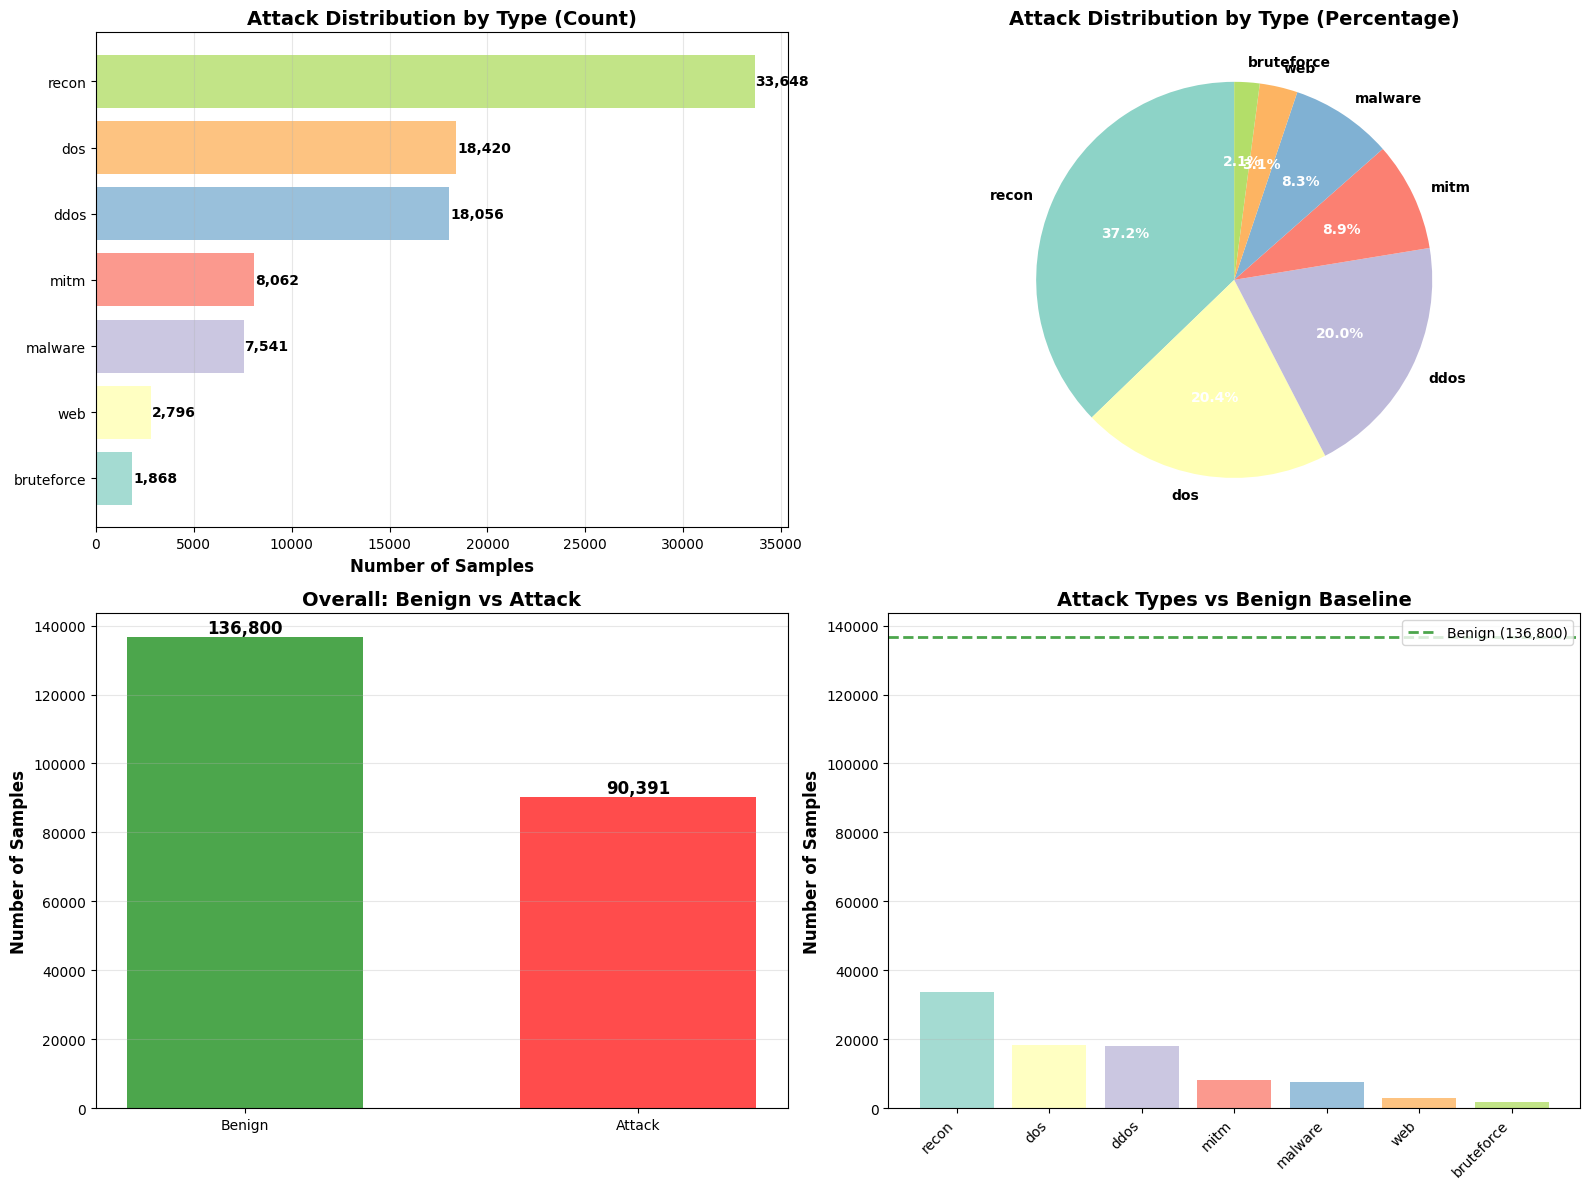

In [16]:
# ============================================
# ATTACK TYPE DISTRIBUTION ANALYSIS
# ============================================

print("\n" + "="*80)
print("📊 ATTACK TYPE DISTRIBUTION ANALYSIS")
print("="*80)

# Check if label2 (attack category) exists
if 'label2' in df.columns:
    
    # Get attack samples only (excluding benign)
    attack_samples = df[df['is_attack'] == 1]
    
    # Count each attack type
    attack_counts = attack_samples['label2'].value_counts()
    
    print("\n🎯 Attack Type Counts:")
    print("-" * 60)
    for attack_type, count in attack_counts.items():
        percentage = (count / len(attack_samples)) * 100
        print(f"  {attack_type:20s}: {count:6,} samples ({percentage:5.2f}%)")
    
    print(f"\n  {'TOTAL ATTACKS':20s}: {len(attack_samples):6,} samples")
    print(f"  {'BENIGN':20s}: {len(df[df['is_attack'] == 0]):6,} samples")
    
    # ============================================
    # VISUALIZATION 1: Bar Chart (Horizontal)
    # ============================================
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Plot 1: Horizontal Bar Chart
    ax1 = axes[0, 0]
    attack_counts_sorted = attack_counts.sort_values(ascending=True)
    colors = plt.cm.Set3(range(len(attack_counts_sorted)))
    
    ax1.barh(attack_counts_sorted.index, attack_counts_sorted.values, color=colors, alpha=0.8)
    ax1.set_xlabel('Number of Samples', fontsize=12, fontweight='bold')
    ax1.set_title('Attack Distribution by Type (Count)', fontsize=14, fontweight='bold')
    ax1.grid(axis='x', alpha=0.3)
    
    # Add value labels
    for i, (attack, count) in enumerate(attack_counts_sorted.items()):
        ax1.text(count + 50, i, f'{count:,}', va='center', fontweight='bold')
    
    # ============================================
    # VISUALIZATION 2: Pie Chart
    # ============================================
    
    ax2 = axes[0, 1]
    colors_pie = plt.cm.Set3(range(len(attack_counts)))
    
    wedges, texts, autotexts = ax2.pie(
        attack_counts.values, 
        labels=attack_counts.index,
        autopct='%1.1f%%',
        colors=colors_pie,
        startangle=90,
        textprops={'fontsize': 10, 'fontweight': 'bold'}
    )
    
    ax2.set_title('Attack Distribution by Type (Percentage)', fontsize=14, fontweight='bold')
    
    # Make percentage text more readable
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')
    
    # ============================================
    # VISUALIZATION 3: Attack vs Benign
    # ============================================
    
    ax3 = axes[1, 0]
    overall_dist = pd.Series({
        'Benign': len(df[df['is_attack'] == 0]),
        'Attack': len(attack_samples)
    })
    
    bars = ax3.bar(overall_dist.index, overall_dist.values, 
                   color=['green', 'red'], alpha=0.7, width=0.6)
    ax3.set_ylabel('Number of Samples', fontsize=12, fontweight='bold')
    ax3.set_title('Overall: Benign vs Attack', fontsize=14, fontweight='bold')
    ax3.grid(axis='y', alpha=0.3)
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}',
                ha='center', va='bottom', fontweight='bold', fontsize=12)
    
    # ============================================
    # VISUALIZATION 4: Stacked Bar (Detailed)
    # ============================================
    
    ax4 = axes[1, 1]
    
    # Create data for stacked bar
    attack_types_with_benign = attack_counts.copy()
    benign_count = len(df[df['is_attack'] == 0])
    
    # Sort by count for better visualization
    attack_types_sorted = attack_counts.sort_values(ascending=False)
    
    x_pos = range(len(attack_types_sorted))
    colors_stack = plt.cm.Set3(range(len(attack_types_sorted)))
    
    ax4.bar(x_pos, attack_types_sorted.values, color=colors_stack, alpha=0.8)
    ax4.axhline(y=benign_count, color='green', linestyle='--', linewidth=2, 
                label=f'Benign ({benign_count:,})', alpha=0.7)
    
    ax4.set_xticks(x_pos)
    ax4.set_xticklabels(attack_types_sorted.index, rotation=45, ha='right')
    ax4.set_ylabel('Number of Samples', fontsize=12, fontweight='bold')
    ax4.set_title('Attack Types vs Benign Baseline', fontsize=14, fontweight='bold')
    ax4.legend(loc='upper right', fontsize=10)
    ax4.grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
  

## 1.3: Missing Values Analysis

In [17]:
print("="*80)
print("MISSING VALUES ANALYSIS")
print("="*80)

missing_count = df.isnull().sum()
missing_percent = (missing_count / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing_count.index,
    'Missing_Count': missing_count.values,
    'Missing_Percent': missing_percent.values
})

missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_df) ==  0:
       print("\n✅ No missing values! Dataset is complete.")

MISSING VALUES ANALYSIS

✅ No missing values! Dataset is complete.


## 1.4: Duplicated Values

In [18]:
print("="*80)
print("DUPLICATE ANALYSIS")
print("="*80)

dup_count = df.duplicated().sum()
dup_percent = (dup_count / len(df)) * 100

print(f"\n🔍 Duplicates: {dup_count:,} ({dup_percent:.2f}%)")

if dup_count > 0:
    print("⚠️  Found duplicates - will need to remove in cleaning step")
else:
    print("✅ No duplicates!")


DUPLICATE ANALYSIS

🔍 Duplicates: 0 (0.00%)
✅ No duplicates!


## Part 1.5: Class Distribution

CLASS DISTRIBUTION - TARGET VARIABLE

📊 Distribution:
   Benign (0): 136,800 samples (60.21%)
   Attack (1): 90,391 samples (39.79%)

📈 Imbalance Ratio: 1.51:1
⚠️  Slightly Imbalanced - Consider class weights


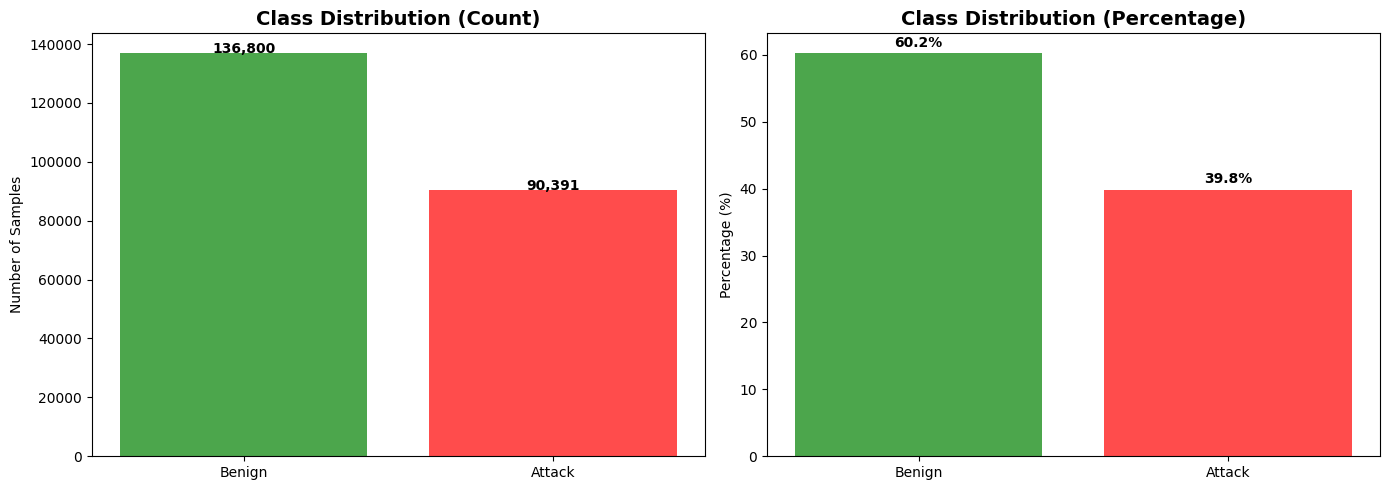

In [20]:
print("="*80)
print("CLASS DISTRIBUTION - TARGET VARIABLE")
print("="*80)

# Count classes
class_counts = df['is_attack'].value_counts().sort_index()
class_percent = df['is_attack'].value_counts(normalize=True).sort_index() * 100

print(f"\n📊 Distribution:")
print(f"   Benign (0): {class_counts[0]:,} samples ({class_percent[0]:.2f}%)")
print(f"   Attack (1): {class_counts[1]:,} samples ({class_percent[1]:.2f}%)")

# Calculate imbalance ratio
ratio = class_counts.max() / class_counts.min()
print(f"\n📈 Imbalance Ratio: {ratio:.2f}:1")

if ratio < 1.5:
    print("✅ Well Balanced - No special handling needed")
elif ratio < 3:
    print("⚠️  Slightly Imbalanced - Consider class weights")
else:
    print("🔴 Severely Imbalanced - Must use SMOTE or class weights!")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
axes[0].bar(['Benign', 'Attack'], class_counts.values, color=['green', 'red'], alpha=0.7)
axes[0].set_title('Class Distribution (Count)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Number of Samples')
for i, v in enumerate(class_counts.values):
    axes[0].text(i, v + 100, f'{v:,}', ha='center', fontweight='bold')

# Percentage plot
axes[1].bar(['Benign', 'Attack'], class_percent.values, color=['green', 'red'], alpha=0.7)
axes[1].set_title('Class Distribution (Percentage)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Percentage (%)')
for i, v in enumerate(class_percent.values):
    axes[1].text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

In [21]:
df.to_csv('01_combined_data.csv', index=False)